In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Generem un dataframe amb els noms dels fitxers a obrir

In [3]:
df = pd.DataFrame({'titol': ['Tarragona', 'La Pineda 1', 'La Pineda 2', 'La Pineda 3', 'La Pineda 4', 'La Pineda 5', 'La Pineda 6', 'La Pineda 7', 'La Pineda 8'] ,'nomfitxer':['11803_11528_1712_ALL_20230101084937_20230228084937.csv', '11804_11529_711015017_ALL_20230101085050_20230228085050.csv', '11804_11530_1711100004_ALL_20230101085101_20230228085101.csv', '11804_11531_711018015_ALL_20230101085113_20230228085113.csv', '11805_11532_1711033276_ALL_20230101085235_20230228085235.csv', '11805_11533_1711100019_ALL_20230101085242_20230228085242.csv', '11805_11534_2099133_ALL_20230101085251_20230228085251.csv', '11806_11535_711029014_ALL_20230101085409_20230228085409.csv', '11806_11536_1711100017_ALL_20230101085414_20230228085414.csv']})

Obrim els fitxers csv inclosos en 'nomfitxer' i els guardem en un diccionari 'df_dict', la clau del diccionari es el numero d'iteració. 

In [4]:
df_dict = dict()
for itera in range(len(df)):
    nomfitxer = df['nomfitxer'][itera]
    df_punt = pd.read_csv(nomfitxer, na_values='-9999.9' ,header=1, delimiter="\t")
    df_punt['Fecha (GMT)'] = pd.to_datetime(df_punt['Fecha (GMT)'])
    df_punt.set_index("Fecha (GMT)")
    df_dict[itera] = df_punt

Obrim el registre de surf:

In [5]:
r_surf = pd.read_csv('RegistreSurfDays2.csv', header=0, delimiter=";")

El format de data no es correcte, afegim una columna per unir data i hora, el modifiquem arrodonint les hores, convertim a datetime64 de pandas i el designem com a index del dataframe, fent servir:

In [6]:
r_surf['datetime'] = pd.to_datetime(r_surf['date'] + ' ' + r_surf['Startsurfingsession'])
r_surf.datetime = pd.to_datetime(r_surf.datetime).dt.round('H')
r_surf.set_index('datetime')

,date,Startsurfingsession,Surfedday,SurfedLocation,TrackRegister,Comment
datetime,,,,,,
2023-01-08 14:00:00,2023-01-08,13:42,SI,Cambrils,SI,NaN
2023-01-16 16:00:00,2023-01-16,16:07,SI,LaPineda,SI,NaN
2023-01-17 16:00:00,2023-01-17,16:16,SI,Barcelona,No,LaPineda
2023-01-20 16:00:00,2023-01-20,15:35,SI,LaPineda,NaN,NaN
2023-01-21 13:00:00,2023-01-21,13:00,SI,LaPineda,No,NaN
2023-01-25 16:00:00,2023-01-25,16:00,SI,LaPineda,NaN,NaN
2023-01-29 13:00:00,2023-01-29,13:00,SI,LaPineda,No,NaN
2023-02-06 17:00:00,2023-02-06,16:45,SI,CapSalou,NaN,NaN
2023-02-07 16:00:00,2023-02-07,15:55,SI,CapSalou,NaN,NaN


Comparem la data en el registre de surf amb cada punt de la col·lecció i l'afegim a la resposta, així tenim les alçades significatives de cada boia en el moment de fer surf, arreglem la columna de dates i la fem servir d'index i reanomenem les columnes:

In [7]:
data = {}
for key in df_dict:
    result = df_dict[key][df_dict[key]['Fecha (GMT)'].isin(r_surf['datetime'])]['Altura Signif. del Oleaje(m)']
    data[key] = result.values
df_result = pd.DataFrame(data, index=r_surf['datetime'])
df_result.index = df_result.index.strftime('%d-%m-%y %H')+'h'
df_result_renamed = df_result.rename(columns={0: 'Tgn', 1: 'LP1', 2: 'LP2', 3: 'LP3', 4: 'LP4', 5: 'LP5', 6: 'LP6', 7: 'LP7', 8: 'LP8'})
print(df_result_renamed)

               Tgn   LP1   LP2   LP3   LP4   LP5   LP6   LP7   LP8
datetime                                                          
08-01-23 14h  0.74  1.04  1.27  1.15  1.15  1.44  1.30  1.31  1.86
16-01-23 16h  1.33  1.25  1.54  1.45  1.44  1.83  1.69  1.73  2.16
17-01-23 16h  1.03  1.57  1.83  1.78  1.71  2.20  2.04  2.08  2.75
20-01-23 16h  0.71  0.63  0.44  0.68  0.41  0.71  0.80  0.89  0.90
21-01-23 13h  0.53  0.51  0.15  0.52  0.15  0.41  0.58  0.73  0.55
25-01-23 16h  0.78  0.92  0.40  0.94  0.38  1.05  1.16  1.18  1.33
29-01-23 13h  0.72  0.62  0.23  0.62  0.22  0.66  0.74  0.76  0.87
06-02-23 17h  2.05  2.41  1.10  2.41  0.97  2.91  2.95  2.82  3.69
07-02-23 16h  1.94  2.25  0.85  2.27  0.80  2.57  2.60  2.76  3.36
08-02-23 15h  1.93  1.90  1.02  1.87  0.77  2.25  2.01  2.09  2.87
09-02-23 14h  1.29  1.08  0.53  1.08  0.42  1.28  1.25  1.25  1.64
10-02-23 13h  0.58  0.57  0.21  0.57  0.19  0.64  0.68  0.66  0.83
11-02-23 10h  0.66  0.54  0.36  0.53  0.26  0.70  0.61  0.57  

Afegim un dataframe per les dades que interessen a l'Anna

In [8]:
# Filtrar df_dict[0] para obtener solo las filas donde 'Fecha (GMT)' está en r_surf['datetime']
filtered_df = df_dict[0][df_dict[0]['Fecha (GMT)'].isin(r_surf['datetime'])]

# Seleccionar las columnas específicas de df_dict[0] que queremos en el nuevo DataFrame
selected_columns_df = filtered_df[['Fecha (GMT)', 'Altura Signif. del Oleaje(m)', 'Periodo de Pico(s)', 'Direcc. Media de Proced.(0=N,90=E)']]

# Ahora, combinar r_surf['datetime'] con el DataFrame filtrado y seleccionado
# Asegurándonos de hacer un merge basado en el valor de las fechas
new_df = pd.merge(
    r_surf[['datetime']],
    selected_columns_df,
    how='inner',
    left_on='datetime',
    right_on='Fecha (GMT)'    
)
new_df.set_index('datetime')
new_df['datetime'] = new_df['datetime'].dt.strftime('%d-%m-%y %H') + 'h'

# Eliminar la columna 'Fecha (GMT)' duplicada si es necesario
new_df.drop('Fecha (GMT)', axis=1, inplace=True)


new_df.columns = ('Dia i hora','Alçada ona','Periode pics','Direccio(0=N,90=E)')
new_df


,Dia i hora,Alçada ona,Periode pics,"Direccio(0=N,90=E)"
0,08-01-23 14h,0.74,6.7,173.0
1,16-01-23 16h,1.33,8.0,189.0
2,17-01-23 16h,1.03,8.3,178.0
3,20-01-23 16h,0.71,9.1,133.0
4,21-01-23 13h,0.53,10.0,121.0
5,25-01-23 16h,0.78,9.1,112.0
6,29-01-23 13h,0.72,8.3,109.0
7,06-02-23 17h,2.05,10.0,101.0
8,07-02-23 16h,1.94,8.3,105.0
9,08-02-23 15h,1.93,9.5,109.0


Fem un diagrama mostrant l'alçada d'ona en cada moment que s'ha fet surf. La linia blava és la de la boia de Tarragona, la resta son boies 'virtuals' s'aprecia una correlació gran entre la boia real i els models.

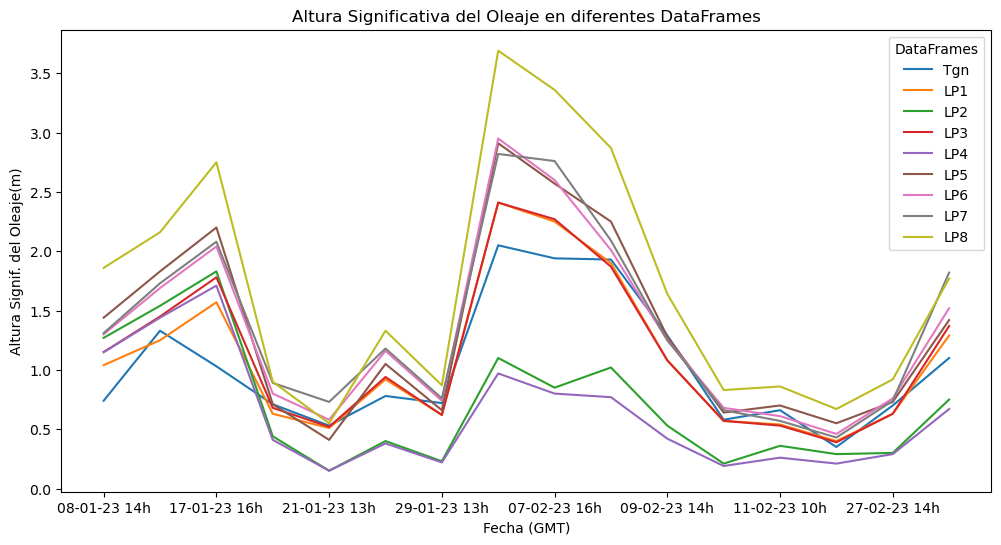

In [9]:
df_result_renamed.plot(figsize=(12, 6))
plt.xlabel('Fecha (GMT)')
plt.ylabel('Altura Signif. del Oleaje(m)')
plt.title('Altura Significativa del Oleaje en diferentes DataFrames')
plt.legend(title='DataFrames')
plt.show()

Obrim ara el fitxer de Vladimir per poder comparar la correlació entre el seu registre i la col·lecció de boies, especialment la boia real.
Corregim el nom de les columnes per evitar espais en blanc i el timestamp per igualar-lo a la resta de dataframes. 

In [10]:
r_vlad = pd.read_csv('combined_boye_stat.csv', header=0, delimiter=",")
r_vlad.columns = r_vlad.columns.str.strip()
r_vlad['Timestamp'] =pd.to_datetime(r_vlad['Timestamp'], format="%Y%m%d%H%M%S").dt.strftime('%d-%m-%y %H')+'h'



Comparem la data en el registre de Vladimir amb les de la boia de Tarragona i l'afegim a la resposta, així tenim l'alçades significativa de la boia en el moment que la càmera obté la mitjana, arreglem la columna de dates i la fem servir d'index i reanomenem les columnes:

In [11]:
r_vlad = pd.read_csv('combined_boye_stat.csv', header=0, delimiter=",")
r_vlad.columns = r_vlad.columns.str.strip()

# Convertir 'Fecha (GMT)' de df_dict[0] a datetime si aún no lo está
df_dict[0]['Fecha (GMT)'] = pd.to_datetime(df_dict[0]['Fecha (GMT)'])

# Convertir 'Timestamp' de r_vlad a datetime si aún no lo está
r_vlad['Timestamp'] = pd.to_datetime(r_vlad['Timestamp'], format='%Y%m%d%H%M%S')

# Redondear a la hora más cercana, si es necesario
df_dict[0]['Fecha (GMT)'] = df_dict[0]['Fecha (GMT)'].dt.round('H')
r_vlad['Timestamp'] = r_vlad['Timestamp'].dt.round('H')

r_vlad['Timestamp'] = pd.to_datetime(r_vlad['Timestamp'])
#r_vlad['Timestamp'] = pd.to_datetime(r_vlad['Timestamp'], format="%Y%m%d%H%M%S").dt.strftime('%d-%m-%y %H')+'h'

# Filtrar df_dict[0] para obtener solo las filas donde 'Fecha (GMT)' está en r_vlad['Timestamp']
filter2_df = df_dict[0][df_dict[0]['Fecha (GMT)'].isin(r_vlad['Timestamp'])]

# Realizar un merge (combinación) entre r_vlad y filter_df basándote en la coincidencia de las fechas
vlad_df = pd.merge(
    left=r_vlad,
    right=filter2_df[['Fecha (GMT)', 'Altura Signif. del Oleaje(m)']],
    left_on='Timestamp',
    right_on='Fecha (GMT)'
)

# Seleccionar las columnas específicas que quieres mantener en vlad_df
vlad_df = vlad_df[['Timestamp', 'Average H', 'Altura Signif. del Oleaje(m)']]


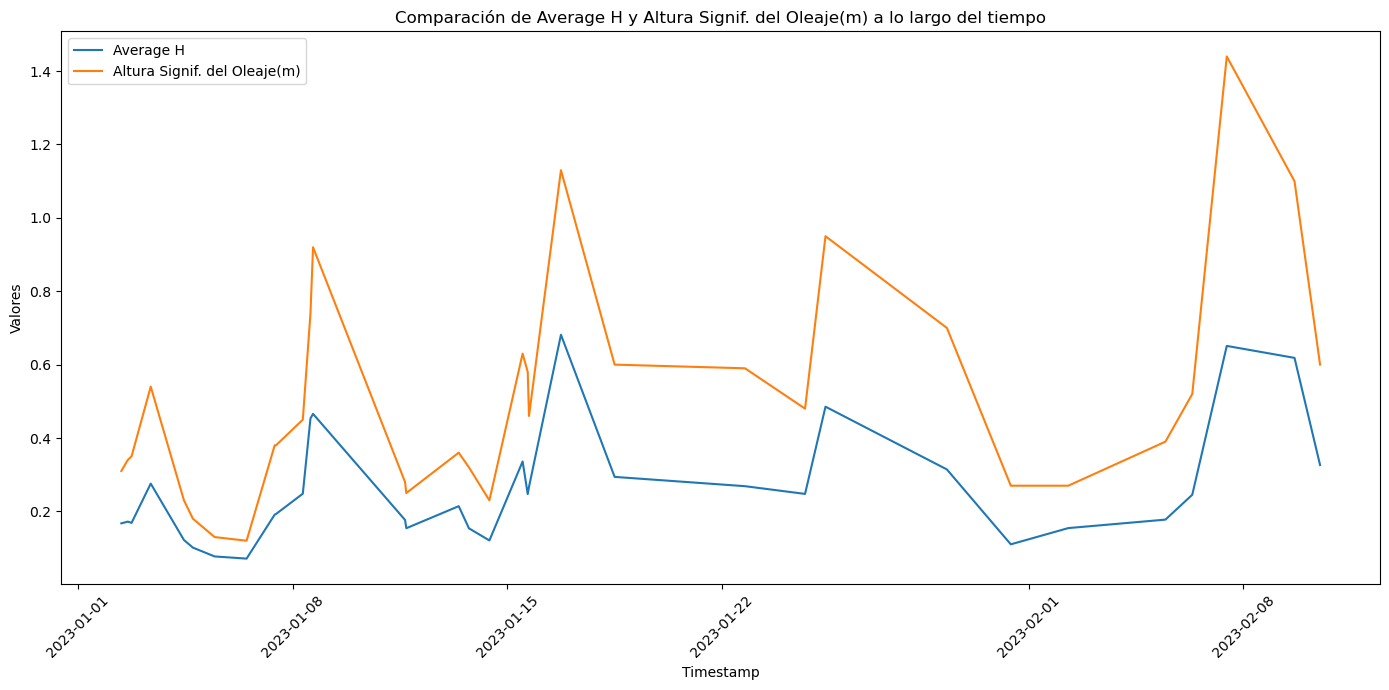

In [12]:

# Iniciar un gráfico de matplotlib
plt.figure(figsize=(14, 7))

# Graficar la segunda columna 'Average H'
sns.lineplot(x='Timestamp', y='Average H', data=vlad_df, label='Average H')

# Graficar la tercera columna 'Altura Signif. del Oleaje(m)'
sns.lineplot(x='Timestamp', y='Altura Signif. del Oleaje(m)', data=vlad_df, label='Altura Signif. del Oleaje(m)')

# Personalización del gráfico
plt.title('Comparación de Average H y Altura Signif. del Oleaje(m) a lo largo del tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend()  # Mostrar la leyenda
plt.tight_layout()  # Ajustar automáticamente los parámetros de la figura para dar espacio a las etiquetas

# Mostrar el gráfico
plt.show()